In [6]:
import os 
import cv2 
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

seed = 42

In [7]:
train_folder = r"E:\dataset\Dog vs Cat Dataset\train"
test_folder = r"E:\dataset\Dog vs Cat Dataset\test"
print("Training Folder path:  ",train_folder)
print("Testing Folder path:   ",test_folder)

Training Folder path:   E:\dataset\Dog vs Cat Dataset\train
Testing Folder path:    E:\dataset\Dog vs Cat Dataset\test


In [8]:
print(os.listdir(train_folder))
for subfolder in os.listdir(train_folder):
    print('subfolder name: ',subfolder)
subfolder_path = os.path.join(train_folder, subfolder)
print('subfolder path: ',subfolder_path)

['cats', 'dogs']
subfolder name:  cats
subfolder name:  dogs
subfolder path:  E:\dataset\Dog vs Cat Dataset\train\dogs


In [9]:
def load_images(folder):
    images = []  
    labels = []  

    for subfolder in os.listdir(folder):
        subfolder_path = os.path.join(folder, subfolder)

        if subfolder == 'dogs':
            label = 1
        else:
            label = 0

        for imagelist in os.listdir(subfolder_path):
            if imagelist.endswith(('.jpg', '.jpeg', '.png')):
                image_path = os.path.join(subfolder_path, imagelist)
                image = cv2.imread(image_path)
                image = cv2.resize(image, (64, 64))
                images.append(image)
                labels.append(label)

    return np.array(images), np.array(labels)

In [10]:
train_images, train_labels = load_images(train_folder)
test_images, test_labels   = load_images(test_folder)

In [11]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(train_labels.shape)

(557, 64, 64, 3)
(557,)
(140, 64, 64, 3)
(557,)


In [12]:
# Reshape images
flat_train_images  = train_images.reshape(train_images.shape[0], -1) 
flat_test_images   = test_images.reshape(test_images.shape[0], -1)

print(flat_train_images.shape)
print(flat_test_images.shape)

(557, 12288)
(140, 12288)


In [13]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Create and train the SVM model
svm_model = make_pipeline(StandardScaler(), SVC(kernel='linear', random_state=seed))
svm_model.fit(flat_train_images, train_labels)

# Make predictions on the test set
svm_predictions = svm_model.predict(flat_test_images)

# Calculate accuracy
accuracy_svm = accuracy_score(test_labels, svm_predictions)
print("Accuracy Score of SVM model:", accuracy_svm)

Accuracy Score of SVM model: 0.5714285714285714


In [14]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

# Define the SVM model with a pipeline for feature scaling
svm_model = make_pipeline(StandardScaler(), SVC(kernel='linear', random_state=seed))

# Define a parameter grid for GridSearchCV
param_grid = {
    'svc__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'svc__gamma': ['scale', 'auto', 0.1, 1, 10],  # Kernel coefficient
}

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(svm_model, param_grid, cv=5)
grid_search.fit(flat_train_images, train_labels)

# Get the best model from the grid search
best_svm_model = grid_search.best_estimator_

# Make predictions on the test set
svm_predictions = best_svm_model.predict(flat_test_images)

# Calculate accuracy
accuracy_svm = accuracy_score(test_labels, svm_predictions)
print("Accuracy Score of SVM model:", accuracy_svm)
print("Best hyperparameters:", grid_search.best_params_)

Accuracy Score of SVM model: 0.5714285714285714
Best hyperparameters: {'svc__C': 0.001, 'svc__gamma': 'scale'}


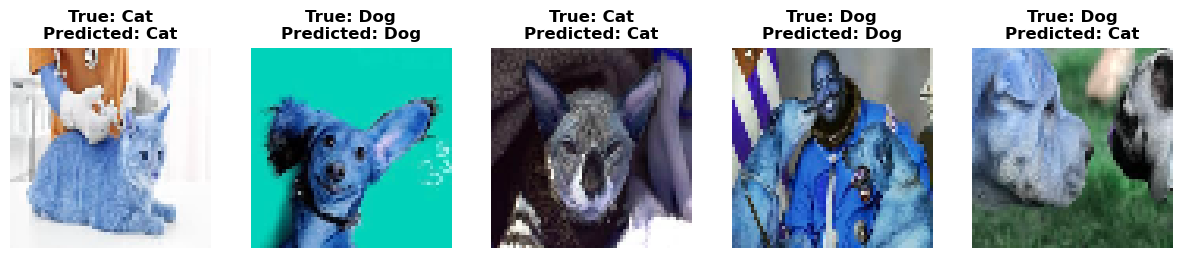

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Define the class names
class_names = {0: 'Cat', 1: 'Dog'}  # Assuming 0 represents 'Cat' and 1 represents 'Dog'

def display_sample_predictions(model, test_images, true_labels, num_samples=5):
    # Get random indices for sample images
    random_indices = np.random.choice(len(test_images), size=num_samples, replace=False)
    
    # Select sample images and true labels
    sample_images = test_images[random_indices]
    sample_true_labels = true_labels[random_indices]
    
    # Reshape the flattened images to (64, 64, 3)
    sample_images_reshaped = sample_images.reshape(-1, 64, 64, 3)
    
    # Flatten the reshaped images before making predictions
    sample_images_flat = sample_images_reshaped.reshape(len(random_indices), -1)
    
    # Make predictions on the sample images
    sample_predictions = model.predict(sample_images_flat)
    
    # Convert numeric labels to class names
    sample_true_labels_names = [class_names[label] for label in sample_true_labels]
    sample_predictions_names = [class_names[label] for label in sample_predictions]
    
    # Display the sample images along with true and predicted labels
    plt.figure(figsize=(15, 5))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(sample_images_reshaped[i])
        plt.title(f'True: {sample_true_labels_names[i]}\nPredicted: {sample_predictions_names[i]}')
        plt.axis('off')
    
    plt.show()

# Display sample predictions using the best SVM model
display_sample_predictions(best_svm_model, flat_test_images, test_labels)